In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [2]:
ds=pd.read_csv('dataset_website.csv')
ds

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,6,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
6,7,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,8,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,9,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
9,10,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1


In [3]:
ds=ds.drop('index', axis = 1)
ds

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [4]:
ds.isnull().any()

having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank                      False
G

In [5]:
ds.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ds.dtypes

having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [7]:
ds['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [8]:
ds.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


In [9]:
print(ds.corr()['Result'].sort_values())  

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


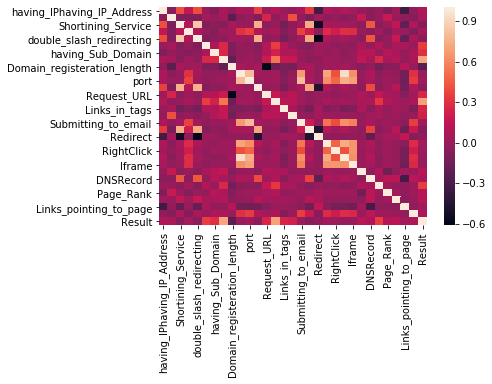

In [10]:
import seaborn as sns
sns.heatmap(ds.corr())

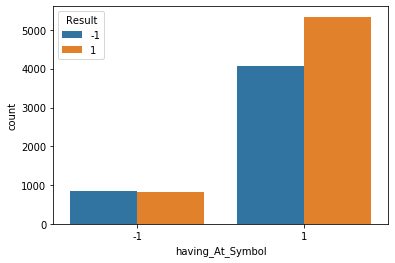

In [11]:
sns.countplot(x='having_At_Symbol',data=ds,hue='Result')

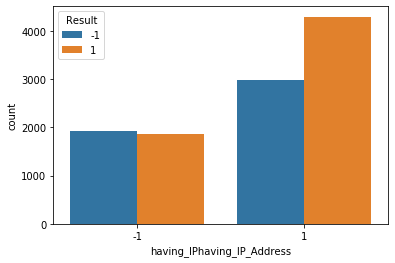

In [12]:
sns.countplot(x='having_IPhaving_IP_Address',data=ds,hue='Result')

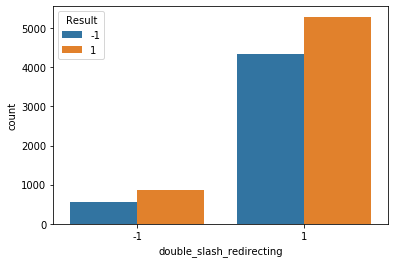

In [13]:
sns.countplot(x='double_slash_redirecting',data=ds,hue='Result')

In [14]:
x=ds.iloc[:,0:30].values
x

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]], dtype=int64)

In [15]:
y=ds.iloc[:,-1].values
y

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

# Splitting

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Since values of y are 1 and -1, classification algorithms are used

# LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [18]:
lr.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_predLR=lr.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
lrAccuracy=accuracy_score(y_test,y_predLR)
lrAccuracy

0.9167797376752601

In [21]:
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1014
           1       0.91      0.94      0.92      1197

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [22]:
confusion_matrix(y_test,y_predLR)

array([[ 905,  109],
       [  75, 1122]], dtype=int64)

### Cross Validation

In [23]:
from sklearn.model_selection import KFold

In [24]:
lr_scores = cross_val_score(lr, x, y, scoring='accuracy', cv=10)

In [25]:
lr_scores

array([0.92224231, 0.92585895, 0.92495479, 0.93128391, 0.92495479,
       0.93755656, 0.92488688, 0.90859729, 0.92488688, 0.92850679])

In [27]:
lr_scores_mean = cross_val_score(lr, x, y, scoring='accuracy', cv=10).mean()
lr_scores_mean

0.9253729145017306

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#k=15
knn1=KNeighborsClassifier(n_neighbors=15,p=1)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [30]:
y_predKnn1=knn1.predict(x_test)
y_predKnn1

array([-1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [31]:
knnAccuracy1=accuracy_score(y_test,y_predKnn1)
knnAccuracy1

0.9344188150158299

In [32]:
print(classification_report(y_test, y_predKnn1))

              precision    recall  f1-score   support

          -1       0.95      0.90      0.93      1014
           1       0.92      0.96      0.94      1197

    accuracy                           0.93      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.94      0.93      0.93      2211



In [33]:
confusion_matrix(y_test,y_predKnn1)

array([[ 917,   97],
       [  48, 1149]], dtype=int64)

In [34]:
#k=25
knn2=KNeighborsClassifier(n_neighbors=25,p=1)
knn2.fit(x_train,y_train)
y_predKnn2=knn2.predict(x_test)
knnAccuracy2=accuracy_score(y_test,y_predKnn2)
knnAccuracy2

0.9298959746720941

In [35]:
print(classification_report(y_test, y_predKnn2))

              precision    recall  f1-score   support

          -1       0.94      0.90      0.92      1014
           1       0.92      0.95      0.94      1197

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [36]:
confusion_matrix(y_test,y_predKnn2)

array([[ 913,  101],
       [  54, 1143]], dtype=int64)

In [37]:
#k=45
knn3=KNeighborsClassifier(n_neighbors=45,p=1)
knn3.fit(x_train,y_train)
y_predKnn3=knn3.predict(x_test)
knnAccuracy3=accuracy_score(y_test,y_predKnn3)
knnAccuracy3

0.9326096788783356

In [38]:
print(classification_report(y_test, y_predKnn3))

              precision    recall  f1-score   support

          -1       0.96      0.89      0.92      1014
           1       0.92      0.96      0.94      1197

    accuracy                           0.93      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [39]:
confusion_matrix(y_test,y_predKnn3)

array([[ 907,  107],
       [  42, 1155]], dtype=int64)

In [40]:
#k=105
knn4=KNeighborsClassifier(n_neighbors=105,p=1)
knn4.fit(x_train,y_train)
y_predKnn4=knn4.predict(x_test)
knnAccuracy4=accuracy_score(y_test,y_predKnn4)
knnAccuracy4

0.9145183175033921

In [41]:
print(classification_report(y_test, y_predKnn3))

              precision    recall  f1-score   support

          -1       0.96      0.89      0.92      1014
           1       0.92      0.96      0.94      1197

    accuracy                           0.93      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [42]:
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1014
           1       0.91      0.94      0.92      1197

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [43]:
confusion_matrix(y_test,y_predKnn4)

array([[ 875,  139],
       [  50, 1147]], dtype=int64)

Knn model with k = 15 has the best accuracy. So we use that model for cross validation.

### Cross Validation

In [44]:
knn_scores = cross_val_score(knn1, x, y, cv=10, scoring='accuracy')
knn_scores

array([0.94575045, 0.95479204, 0.94122966, 0.95117541, 0.96112116,
       0.95837104, 0.93393665, 0.9321267 , 0.94660633, 0.94660633])

In [45]:
knn_scores_mean = cross_val_score(knn1, x, y, scoring='accuracy', cv=10).mean()
knn_scores_mean

0.9471715774917563

# SVM

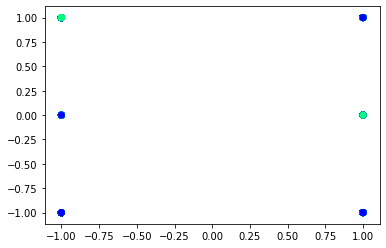

In [46]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='winter')

### SVM rbf

In [47]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf')
svm1.fit(x_train,y_train) 

SVC()

In [48]:
y_predSVM1=svm1.predict(x_test)
from sklearn.metrics import accuracy_score
svm_rbfAccuracy=accuracy_score(y_test,y_predSVM1)
svm_rbfAccuracy

0.9407507914970602

In [49]:
print(classification_report(y_test, y_predSVM1))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1014
           1       0.93      0.96      0.95      1197

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [50]:
confusion_matrix(y_test,y_predSVM1)

array([[ 933,   81],
       [  50, 1147]], dtype=int64)

### SVM Polynomial

In [51]:
svm2=SVC(kernel='poly')
svm2.fit(x_train,y_train) 

SVC(kernel='poly')

In [52]:
y_predSVM2=svm2.predict(x_test)
from sklearn.metrics import accuracy_score
svm_sigAccuracy=accuracy_score(y_test,y_predSVM2)
svm_sigAccuracy

0.945273631840796

In [53]:
print(classification_report(y_test, y_predSVM2))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1014
           1       0.94      0.96      0.95      1197

    accuracy                           0.95      2211
   macro avg       0.95      0.94      0.94      2211
weighted avg       0.95      0.95      0.95      2211



In [54]:
confusion_matrix(y_test,y_predSVM2)

array([[ 942,   72],
       [  49, 1148]], dtype=int64)

### Cross Validation

In [55]:
svm_scores = cross_val_score(svm2, x, y, cv=10, scoring='accuracy')
svm_scores

array([0.95207957, 0.95117541, 0.95479204, 0.9556962 , 0.95840868,
       0.96561086, 0.9520362 , 0.93846154, 0.95656109, 0.95113122])

In [56]:
svm_scores_mean = cross_val_score(svm2, x, y, cv=10, scoring='accuracy').mean()
svm_scores_mean

0.9535952803711553

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [59]:
from sklearn.model_selection import GridSearchCV
decision_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dist,cv=10, n_jobs=-1)

In [60]:
decision_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [61]:
decision_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [62]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [63]:
y_predDT=dt.predict(x_test)
y_predDT

array([-1, -1,  1, ..., -1, -1,  1], dtype=int64)

In [64]:
dtAccuracy=accuracy_score(y_test,y_predDT)
dtAccuracy

0.9149706015377658

In [65]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      1014
           1       0.92      0.93      0.92      1197

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



In [66]:
confusion_matrix(y_test,y_predDT)

array([[ 913,  101],
       [  87, 1110]], dtype=int64)

### Cross Validation

In [67]:
dt_scores = cross_val_score(dt, x, y, cv=10, scoring='accuracy')
dt_scores

array([0.90777577, 0.90777577, 0.9159132 , 0.9159132 , 0.920434  ,
       0.93122172, 0.91764706, 0.90950226, 0.92579186, 0.92669683])

In [68]:
dt_scores_mean = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
dt_scores_mean

0.9178671663407331

# Random Forest

In [69]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [70]:
estimator_1 = 100
max_depth_1 = 2
criterion_1='gini'
clf1 = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=2,oob_score=True)
rf1 = clf1.fit(x_train,y_train)
y_pred = rf1.predict(x_test)
print("Evaluating the Algorithm:\n")
cm1 = confusion_matrix(y_test, y_pred)
acc1 = metrics.accuracy_score(y_test,y_pred)
oob_score_1 = clf1.oob_score_
cv1 = cross_val_score(clf1, x_train, y_train,cv = 5)
print('oobscore:',oob_score_1)
print('cross val:',cv1)
print('\naccuracy:',acc1)
print('\nConfusion Matrix: \n',cm1)

Evaluating the Algorithm:

oobscore: 0.9139529624604251
cross val: [0.91633691 0.92142453 0.90616167 0.93159977 0.91742081]

accuracy: 0.924468566259611

Confusion Matrix: 
 [[ 879  135]
 [  32 1165]]


In [71]:
estimator_2 = 100
max_depth_2 = 2
criterion_2='entropy'
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=2,oob_score=True)
rf2 = clf2.fit(x_train,y_train)
y_pred = rf2.predict(x_test)
print("Evaluating the Algorithm:\n")
cm2 = confusion_matrix(y_test, y_pred)
acc2 = metrics.accuracy_score(y_test, y_pred)
oob_score_2 = clf2.oob_score_
cv2 = cross_val_score(clf2, x_train, y_train,cv = 2)
print('oobscore:',oob_score_2)
print('cross val:',cv2)
print('\naccuracy:',acc2)
print('\nConfusion Matrix: \n',cm2)

Evaluating the Algorithm:

oobscore: 0.9069425599276345
cross val: [0.91293532 0.92220715]

accuracy: 0.9181365897783809

Confusion Matrix: 
 [[ 846  168]
 [  13 1184]]


In [72]:
estimator_3 = 50
max_depth_3 = 5
criterion_3='gini'
clf3 = RandomForestClassifier(n_estimators= estimator_3, criterion='gini',max_depth=3,oob_score=True)
rf3  = clf3.fit(x_train,y_train)
y_pred = rf3.predict(x_test)
print("Evaluating the Algorithm:\n")
cm3 = confusion_matrix(y_test, y_pred)
acc3 = metrics.accuracy_score(y_test, y_pred)
oob_score_3 = clf3.oob_score_
cv3 = cross_val_score(clf3, x_train, y_train,cv = 2)
print('oobscore:',oob_score_3)
print('cross val:',cv3)
print('\naccuracy:',acc3)
print('\nConfusion Matrix: \n',cm3)

Evaluating the Algorithm:

oobscore: 0.9158751696065129
cross val: [0.92492085 0.92243329]

accuracy: 0.9149706015377658

Confusion Matrix: 
 [[ 901  113]
 [  75 1122]]


In [73]:
estimator_4 = 50
max_depth_4 = 5
criterion_4='entropy'
clf4 = RandomForestClassifier(n_estimators= estimator_3, criterion='gini',max_depth=3,oob_score=True)
rf4 = clf4.fit(x_train,y_train)
y_pred = rf4.predict(x_test)
print("Evaluating the Algorithm:\n")
cm4 = confusion_matrix(y_test, y_pred)
acc4 = metrics.accuracy_score(y_test, y_pred)
oob_score_4= clf4.oob_score_
cv4= cross_val_score(clf4, x_train, y_train,cv = 2)
print('oobscore:',oob_score_4)
print('cross val:',cv4)
print('\naccuracy:',acc4)
print('\nConfusion Matrix: \n',cm4)

Evaluating the Algorithm:

oobscore: 0.9180235187697874
cross val: [0.92062415 0.9305744 ]

accuracy: 0.9199457259158752

Confusion Matrix: 
 [[ 892  122]
 [  55 1142]]


In [74]:

data = {'n_estimators': [estimator_1,estimator_2,estimator_3,estimator_4], 
                'max_depth':  [max_depth_1,max_depth_2,max_depth_3,max_depth_4], 
                'criterion': [criterion_1,criterion_2,criterion_3,criterion_4,],
                'cross_val_score':[cv1,cv2,cv3,cv4],'accuracy':[acc1,acc2,acc3,acc4]}

In [75]:
table=pd.DataFrame(data)

In [76]:
table

,n_estimators,max_depth,criterion,cross_val_score,accuracy
0,100,2,gini,"[0.9163369135104579, 0.9214245336348219, 0.906...",0.924469
1,100,2,entropy,"[0.9129353233830846, 0.9222071460877431]",0.918137
2,50,5,gini,"[0.9249208502939846, 0.9224332881049299]",0.914971
3,50,5,entropy,"[0.9206241519674355, 0.9305744007236545]",0.919946


**THE RANDOM FOREST MODEL WITH 100 ESTIMATORS , MAX_DEPTH=2 using gini criterion shows the most acc out of the 4 rf models**

# Model Comparison

In [78]:
models = pd.DataFrame({ 
    'Model': [ 'Logistic Regression', 'KNN','SVM','Decision Tree','Random Forest'],
    'Test Score': [ lr_scores_mean,knn_scores_mean,svm_scores_mean,dt_scores_mean,acc1]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
2,SVM,0.953595
1,KNN,0.947172
0,Logistic Regression,0.925373
4,Random Forest,0.924469
3,Decision Tree,0.917867


**SVM has the highest accuracy**